<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [1]:
import numpy as np

np.random.rand()                # Give one number

0.4444514935787359

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.90116017, 0.36441181, 0.80647009, 0.09074114, 0.15905424,
       0.77331626, 0.11431656, 0.01835352, 0.27335016, 0.90932734])

In [3]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.82622953, 0.78842716],
       [0.18698169, 0.00668367],
       [0.76280185, 0.99813884],
       [0.88462324, 0.20140529],
       [0.52944038, 0.57172407]])

In [4]:
# All the numbers are between 0 and 1.
# The numbers are (more or less) evenly (i.e. uniformly) distributed to cover the interval between 0 and 1.

In [5]:
n = 10000
random_numbers = np.random.rand(n)

In [6]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.559999999999995

In [7]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.959999999999997

In [8]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.06

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

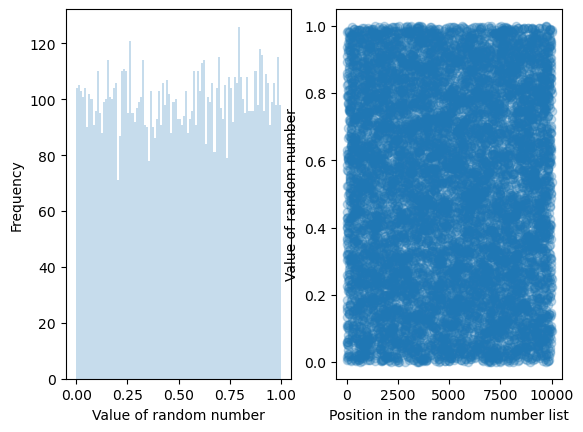

In [9]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

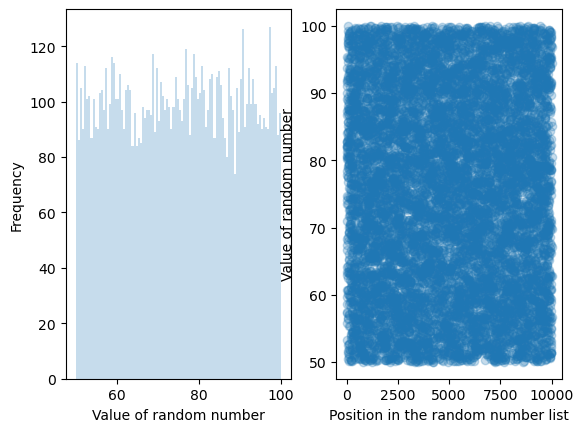

In [10]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [11]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([52, 81, 41,  7, 66, 44, 69, 89, 19,  3])

In [12]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([75, 25, 98, 57, 85, 25, 81, 57, 92, 96])

In [13]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [14]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [15]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [16]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')
    
# np.random.choice() picks one of the options randomly. So, getting each is equally likely.

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [17]:
np.random.choice(['Head', 'Tails'])

'Head'

In [18]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [19]:
# consider any number in (0, .5] to be Tails and any number in (.5, 1) to be Heads

def flip_coins(no_of_coins=1, probability=.5):

# fair coin -> probability = 0.5

    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [20]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


### 3.2 A biased coin

In [21]:
# biased coin -> probability = not 0.5

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

In [22]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

# np.unique() with return_counts=True returns the unique values (of Heads) in the list and how many times they occur

In [23]:
heads_probability = heads_counts/no_of_repeats

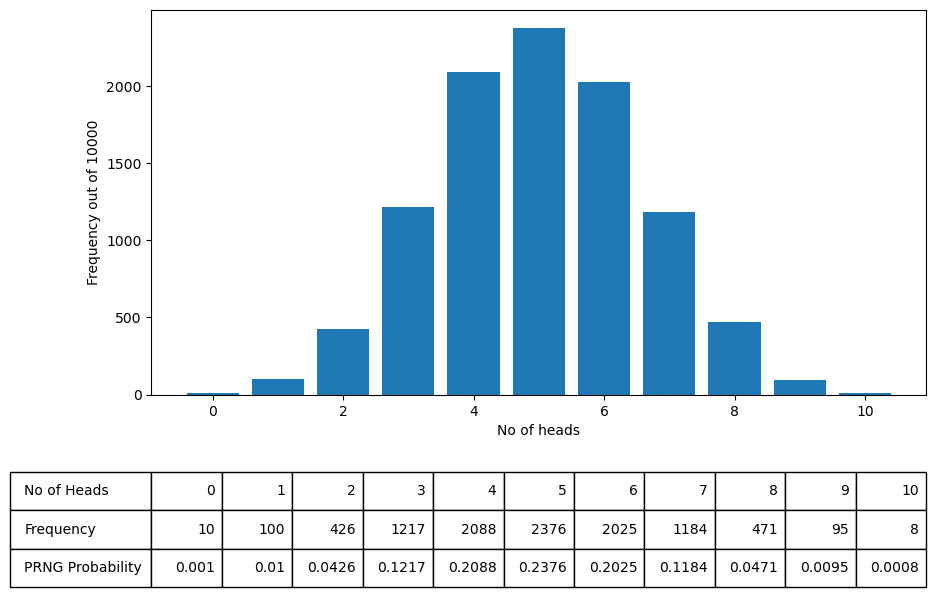

In [24]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [25]:
from scipy.stats import binom

In [26]:
binom.pmf(k=7, n=10, p=.5)

0.11718750000000004

In [29]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

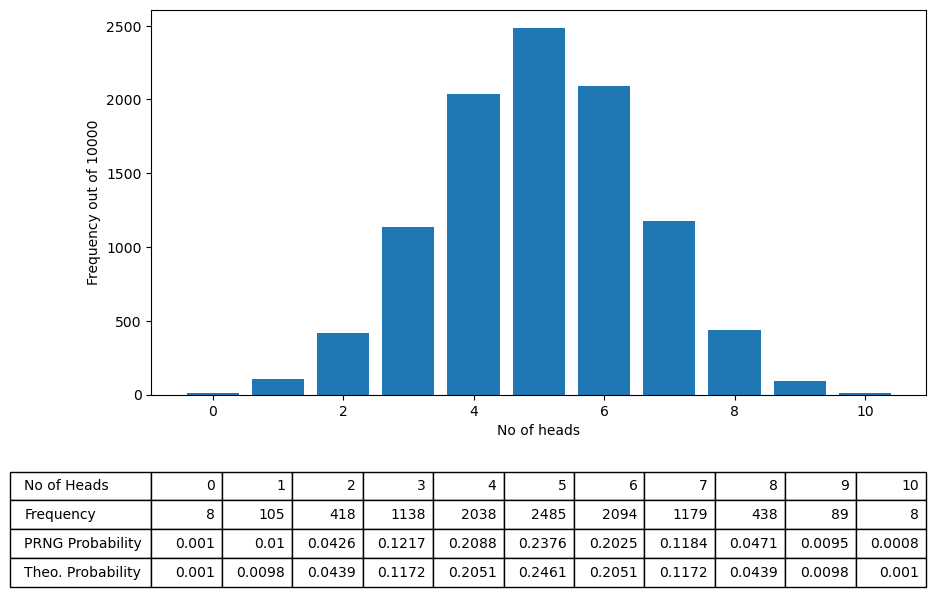

In [33]:
from matplotlib import pyplot as plt

no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, np.round(binomial_probabilities, decimals=4)],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', 'Theo. Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C




# Your solution here




In [34]:
def carbon_thirteen(no_of_atoms=27, probability=.9889):
    results = np.random.rand(no_of_atoms)
    no_of_13C = np.sum(results > probability)
    return no_of_13C